### Object Detection with Caffe

In this example, we will use trained Neural Networks models with Caffe framework with OpenCV for object detection.

#### What is Caffe ? 

**Caffe**:  Caffe is a deep learning framework made with expression, speed, and modularity in mind. It is developed by Berkeley AI Research (BAIR) and by community contributors. Yangqing Jia created the project during his PhD at UC Berkeley. Caffe is released under the BSD 2-Clause license. 

http://caffe.berkeleyvision.org/

In this tutorial we will go through object detection using OpenCV and pre-trained model from Caffe Framework. OpenCV DNN library is able to make inference call with pretrained models from Caffe Framework. 

https://github.com/opencv/opencv/tree/master/samples/dnn

We will use a pretrained model of Caffe framework to detect object.

In [1]:
#Just, chekcing if packages installed. 
# You can use following command to install missing packages
!pip install --upgrade pip
!pip install opencv-python

Requirement already up-to-date: pip in /home/intelnuc/anaconda3/lib/python3.6/site-packages (10.0.1)


In [2]:
# Lets import OpenCV library and Numpy
import cv2 as cv
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

OpenCV DNN API needs Caffe's predefined neural network file and its weights representation as proto and model file.

Caffe Model Zoo, has plenty of sample models in https://github.com/BVLC/caffe/wiki/Model-Zoo . These models have been trained by a lot researchers around the world with different set of training data sets.

In this example, we will use MobileNetSSD model and proto files.

Model and Proto file can be accessed from: https://github.com/chuanqi305/MobileNet-SSD

SSD is an unified framework for object detection with a single network. This defines the structure of neural net. MobileNet is a image classifier, specifically designed for mobile and embedded vision. 

Model's visual recognition, are trained with MS-COCO open source image set, any known image set. After all training process, you would have a model file which stores neural net's configurations and proto file to define network itself.

#### Model File

Binary file generated by Caffe framework after traninig to reuse along with all different platforms. Underlying data is the neural net configurations and weights.

#### Proto

Human readable text file used for training of models and define the Convolutional Neural Networks parameters and configurations.

In this example, we will use MobileNetSSD models. 

**Before going forward download model and proto files to model folder.**

- https://github.com/chuanqi305/MobileNet-SSD/blob/master/MobileNetSSD_deploy.caffemodel?raw=true
- https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/MobileNetSSD_deploy.prototxt

Note: you can wget to download files from terminal

```shell
wget -O /home/upsquared/workshop/lab-opencv-examples/OpenCV_Object_Detection/models/MobileNetSSD_deploy.prototxt https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/MobileNetSSD_deploy.prototxt

wget -O /home/upsquared/workshop/lab-opencv-examples/OpenCV_Object_Detection/models/MobileNetSSD_deploy.caffemodel https://github.com/chuanqi305/MobileNet-SSD/blob/master/MobileNetSSD_deploy.caffemodel?raw=true
```

In [3]:
# here is the models paths

caffe_model = 'models/MobileNetSSD_deploy.caffemodel'
caffe_proto = 'models/MobileNetSSD_deploy.prototxt'

#if files are not loaded, download from:

#import os.path
#import urllib.request

#if not os.path.isfile(caffe_model):
#    print('File Not Found: ', caffe_model)
#    caffe_model_path = 'https://github.com/chuanqi305/MobileNet-SSD/blob/master/MobileNetSSD_deploy.caffemodel?raw=true'
#    print('Downloading .... : ', caffe_model_path)
#    urllib.request.urlretrieve(caffe_model_path, caffe_model)
#    print('Download Finished: ', caffe_model_path)
    
#if not os.path.isfile(caffe_proto):
#    print('File Not Found: ', caffe_proto)
#    caffe_proto_path = 'https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/MobileNetSSD_deploy.prototxt'
#    print('Downloading .... : ', caffe_proto_path)
#    urllib.request.urlretrieve(caffe_proto_path, caffe_proto)
#    print('Download Finished: ', caffe_proto_path)

In [4]:
#caffe model labels for objects are predefined for MobileNetSSD caffe model and protbuf.
# Existing model exported from the above source, has been trained for below objects.

labels = ("background", "aeroplane", "bicycle", 
          "bird", "boat", "bottle", "bus", 
          "car", "cat", "chair", "cow", 
          "diningtable", "dog", "horse", 
          "motorbike", "person", "pottedplant", 
          "sheep", "sofa", "train", "tvmonitor")

#label_colors = np.random.uniform(0, 255, (len(labels),3))
# we generated random colors for each label to determine object on frame
label_colors = [[ 70.03036239,  53.39948712, 221.96066983],
                   [ 72.40459246,  81.85653543, 216.79091508],
                   [ 16.05095266, 156.74660586,  28.22137944],
                   [ 22.14580474, 245.30084464, 203.24240217],
                   [ 67.87645208,  61.44175277,  62.59789847],
                   [252.36723978,   5.40010433,  73.84552673],
                   [207.95470272,  96.58437259,  17.00872131],
                   [108.9367236 , 180.97081026,  78.16660705],
                   [237.0586842 , 160.01565458, 106.49361722],
                   [131.40428931,  43.9492775 , 222.22671871],
                   [109.40802485, 123.90466382, 208.49082336],
                   [241.25056538, 246.46355905, 215.40549655],
                   [ 50.53963961, 188.7669464 ,  14.91525421],
                   [104.91164983,  13.90156432,  80.97275078],
                   [ 65.87683959, 160.34697271, 199.46650188],
                   [ 16.08423214,  84.441482  , 163.3640731 ],
                   [ 68.50589207,  65.21968418, 229.81699866],
                   [151.91579089, 195.49198107,  94.49696933],
                   [132.74947445,  14.51457431, 163.51873436],
                   [ 83.84690577, 178.29185705, 128.78807612],
                   [195.2857407 , 247.73377045, 175.55730603]]

In [5]:
# Let's define and open an existing image from our resources
source_image = '../images/street/YellowWhite.jpg'
img = cv.imread(source_image)

Here is DNN API call to load network and model weights for inference. It returns the Net class, object.

https://docs.opencv.org/trunk/db/d30/classcv_1_1dnn_1_1Net.html 

In [6]:
net = cv.dnn.readNetFromCaffe(caffe_proto, caffe_model)

Now, we will make OpenCV DNN to get image to generate a blob after mean subtraction, normalizing, and channel swapping.

**blob**: (A Binary Large OBject) 4-dimensional blob from series of images.

**blobFromImage**
Creates 4-dimensional blob from series of images. Optionally resizes and crops images from center, subtract mean values, scales values by scalefactor, swap Blue and Red channels.

Neural net uses image to generate detected object list with given parameters, these parameters can be found from: https://github.com/opencv/opencv/tree/master/samples/dnn 

Below, we get blob to send it to network for object detection.

In [7]:
# Now, we open the image we want to run object detection of MobileNetSSD model.

# First we get image size
orig_rows = img.shape[0]
orig_cols = img.shape[1]

rows = 300
cols = 300

resized_img = cv.resize(img,(rows,cols))

blob = cv.dnn.blobFromImage(resized_img, 0.00784, (rows, cols), (127.5, 127.5, 127.5), swapRB=True, crop=False)

# send blob input to neural net 
net.setInput(blob)

Detected: 
car 0.3602
car 0.2893


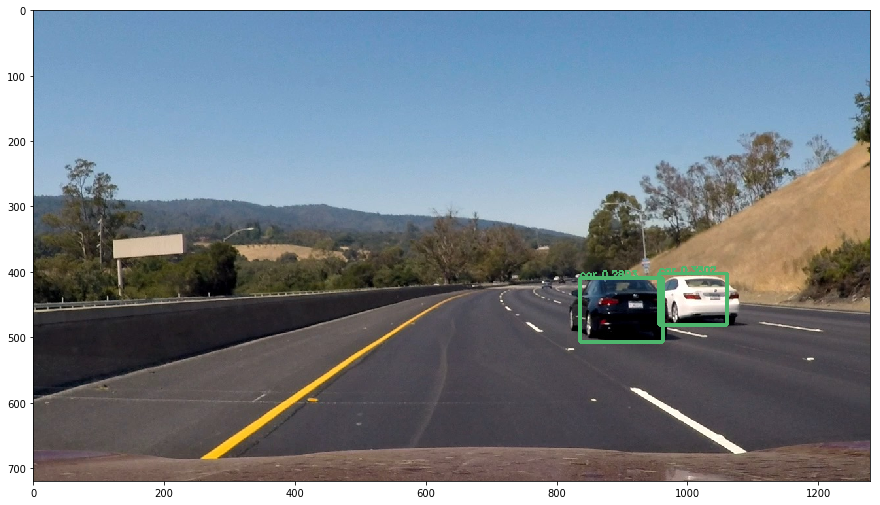

In [8]:
# forward method is asking all detected objects
out = net.forward()

# confidence is used as thresheold for confidence for the detected object.
# this means how the object fitted to detected object
confidence = 0.2

print('Detected: ')
## here we get the data for each detected object in the blob
for detection in out[0,0,:,:]:
    #confidence score
    score = float(detection[2])
    
    #label index
    label_index = int(detection[1])

    # draw rectangle and write the name of the object if above given confidence
    if score > confidence:
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        
        label_text = labels[label_index] +  " " + str(round(score, 4))
        print(label_text)
        cv.putText(resized_img, label_text, (int(left), int(top)), cv.FONT_HERSHEY_SIMPLEX, 0.5, label_colors[label_index], 2)       
        cv.rectangle(resized_img, (int(left), int(top)), (int(right), int(bottom)), label_colors[label_index], thickness=3)

        #original image
        row_factor = orig_rows/300.0  
        col_factor = orig_cols/300.0
        
        # Scale object detection to original image
        left = int(col_factor * left) 
        top = int(row_factor * top)
        right   = int(col_factor * right)
        bottom   = int(row_factor * bottom)
        
        cv.putText(img, label_text, (int(left), int(top)), cv.FONT_HERSHEY_SIMPLEX, 0.5, label_colors[label_index], 2)       
        cv.rectangle(img, (int(left), int(top)), (int(right), int(bottom)), label_colors[label_index], thickness=3)
        
# show image on a window
#cv.imshow('img', img)
#print image on notebook, Cars has been detected
#plt.imshow(cv.cvtColor(resized_img, cv.COLOR_BGR2RGB))
plt.figure(figsize=(15, 15))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
#cv.waitKey()

## Resources

- https://github.com/opencv/opencv/tree/master/samples/dnn
- https://github.com/opencv/opencv/blob/master/samples/dnn/object_detection.py
- https://github.com/weiliu89/caffe/tree/ssd 


## DO IT YOURSELF

Now, you see how object recognition works with Caffe models using OpenCV. From this point, you can try to run your own samples.

You can go and give it a try with following steps or next actions to take.

- New images with certain objects.
- Different confidence levels
- Other Caffe Models
- Learn Caffe framework, create your own model and try it.

Detected: 
car 0.3602
car 0.2893


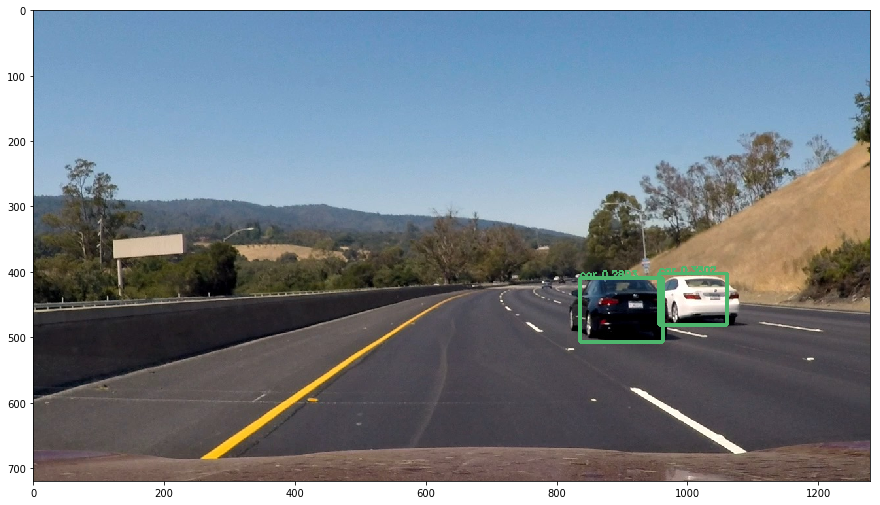

In [9]:
import cv2 as cv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

caffe_model = 'models/MobileNetSSD_deploy.caffemodel'
caffe_proto = 'models/MobileNetSSD_deploy.prototxt'

labels = ("background", "aeroplane", "bicycle", 
          "bird", "boat", "bottle", "bus", 
          "car", "cat", "chair", "cow", 
          "diningtable", "dog", "horse", 
          "motorbike", "person", "pottedplant", 
          "sheep", "sofa", "train", "tvmonitor")


label_colors = [[ 70.03036239,  53.39948712, 221.96066983],
                   [ 72.40459246,  81.85653543, 216.79091508],
                   [ 16.05095266, 156.74660586,  28.22137944],
                   [ 22.14580474, 245.30084464, 203.24240217],
                   [ 67.87645208,  61.44175277,  62.59789847],
                   [252.36723978,   5.40010433,  73.84552673],
                   [207.95470272,  96.58437259,  17.00872131],
                   [108.9367236 , 180.97081026,  78.16660705],
                   [237.0586842 , 160.01565458, 106.49361722],
                   [131.40428931,  43.9492775 , 222.22671871],
                   [109.40802485, 123.90466382, 208.49082336],
                   [241.25056538, 246.46355905, 215.40549655],
                   [ 50.53963961, 188.7669464 ,  14.91525421],
                   [104.91164983,  13.90156432,  80.97275078],
                   [ 65.87683959, 160.34697271, 199.46650188],
                   [ 16.08423214,  84.441482  , 163.3640731 ],
                   [ 68.50589207,  65.21968418, 229.81699866],
                   [151.91579089, 195.49198107,  94.49696933],
                   [132.74947445,  14.51457431, 163.51873436],
                   [ 83.84690577, 178.29185705, 128.78807612],
                   [195.2857407 , 247.73377045, 175.55730603]]

net = cv.dnn.readNetFromCaffe(caffe_proto, caffe_model)

source_image = '../images/street/YellowWhite.jpg'
img = cv.imread(source_image)

orig_rows = img.shape[0]
orig_cols = img.shape[1]

rows = 300
cols = 300

resized_img = cv.resize(img,(rows,cols))

blob = cv.dnn.blobFromImage(resized_img, 0.00784, (rows, cols), (127.5, 127.5, 127.5), swapRB=True, crop=False)

# send blob input to neural net 
net.setInput(blob)

out = net.forward()

confidence = 0.2

print('Detected: ')

for detection in out[0,0,:,:]:
    #confidence score
    score = float(detection[2])
    
    #label index
    label_index = int(detection[1])

    # draw rectangle and write the name of the object if above given confidence
    if score > confidence:
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        
        label_text = labels[label_index] +  " " + str(round(score, 4))
        print(label_text)
        cv.putText(resized_img, label_text, (int(left), int(top)), cv.FONT_HERSHEY_SIMPLEX, 0.5, label_colors[label_index], 2)       
        cv.rectangle(resized_img, (int(left), int(top)), (int(right), int(bottom)), label_colors[label_index], thickness=3)

        #original image
        row_factor = orig_rows/300.0  
        col_factor = orig_cols/300.0
        
        # Scale object detection to original image
        left = int(col_factor * left) 
        top = int(row_factor * top)
        right   = int(col_factor * right)
        bottom   = int(row_factor * bottom)
        
        cv.putText(img, label_text, (int(left), int(top)), cv.FONT_HERSHEY_SIMPLEX, 0.5, label_colors[label_index], 2)       
        cv.rectangle(img, (int(left), int(top)), (int(right), int(bottom)), label_colors[label_index], thickness=3)

plt.figure(figsize=(15, 15))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
